In [15]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [16]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [17]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [26]:
html = browser.html
table_soup = soup(html, 'html.parser')

In [27]:
table = table_soup.find('table', class_='table')

In [28]:
print(table.text)



id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181


In [29]:
import pandas as pd 

In [30]:
headers = []
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

df = pd.DataFrame(columns = headers)

for j in table.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df)
        df.loc[length] = row

In [31]:
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [32]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [36]:
df.id = df.id.astype(int)

In [37]:
df.pressure = df.pressure.astype(float)

In [38]:
df.min_temp = df.min_temp.astype(float)

In [39]:
df.sol = df.sol.astype(int)

In [40]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   object        
 4   month             1867 non-null   object        
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 116.7+ KB


In [42]:
df.describe()

,id,sol,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,-76.121050,841.066417
std,545.048507,565.342298,5.504098,54.253226
min,2.000000,10.000000,-90.000000,727.000000
25%,489.500000,546.500000,-80.000000,800.000000
50%,959.000000,1028.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,-72.000000,883.000000
max,1895.000000,1977.000000,-62.000000,925.000000


In [53]:
df.to_csv('mars_Data.csv')

In [43]:
max_martian_days = df['sol'].max()
max_martian_days

1977

In [44]:
min_avg_temp= df.groupby(['month'])['min_temp'].mean()
min_avg_temp


month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

In [54]:
min_avg_temp.to_csv('min_avg_temp.csv')

In [45]:

import matplotlib.pyplot as plt

import numpy as np

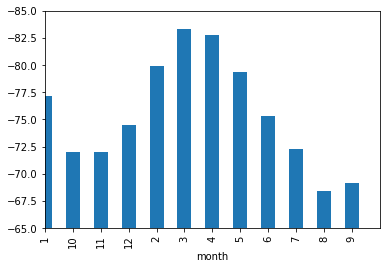

In [47]:
#min_avg_temp.plot.bar(x="Minimum_temp", y="Month", kind ='bar')
#plt.show()

# Set x-axis and tick locations.
fig = plt.figure()
y_axis = np.arange(len(min_avg_temp))
#tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
# Plot the data.
min_avg_temp.plot.bar(x="Month", y="Minimum Temp")
#plt.xticks(tick_locations, min_avg_temp["Month"])
plt.xlim(0, 12)
plt.ylim(-65, -85)
plt.show()

In [48]:
min_avg_pressure= df.groupby(['month'])['pressure'].mean()
min_avg_pressure

min_avg_pressure.columns = ['Month', 'Pressure']
min_avg_pressure

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

In [55]:
min_avg_pressure.to_csv('average_pressure.csv')



fig = plt.figure()
x_axis = np.arange(len(min_avg_temp))
tick_locations = [value for value in x_axis]

min_avg_pressure.plot.barh(x="Month", y="Minimum pressure")
#plt.xticks(tick_locations, min_avg_pressure["Month"])
plt.show()

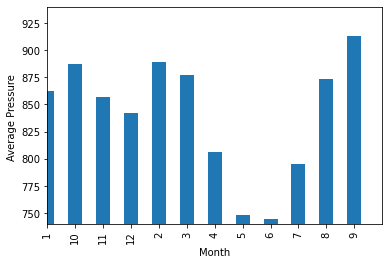

<Figure size 432x288 with 0 Axes>

In [49]:
#min_avg_temp.plot.bar(x="Minimum_temp", y="Month", kind ='bar')
#plt.show()

# Set x-axis and tick locations.
fig = plt.figure()
y_axis = np.arange(len(min_avg_pressure))
#tick_locations = [value for value in y_axis]
# Plot the data.
min_avg_pressure.plot.bar(x="Month", y="Minimum pressure")
plt.xlabel("Month")
plt.ylabel("Average Pressure ")
plt.xlim(0, 12)
plt.ylim(740, 940)
plt.show()
plt.savefig('Average_pressure_graph.png')

In [50]:
min_daily_temp= df.groupby(['sol'])['min_temp'].mean()
min_daily_temp

sol
10     -75.0
11     -76.0
12     -76.0
13     -74.0
14     -74.0
        ... 
1973   -78.0
1974   -77.0
1975   -76.0
1976   -77.0
1977   -77.0
Name: min_temp, Length: 1867, dtype: float64

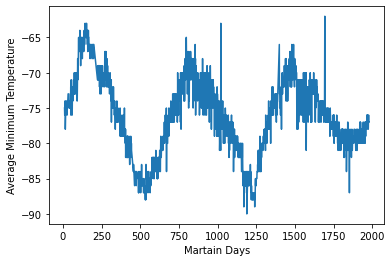

In [51]:
min_daily_temp.plot(x="sol", y="min_temp")

plt.xlabel("Martain Days")
plt.ylabel("Average Minimum Temperature")
plt.show()

In [52]:
min_daily_temp.to_csv('daily_temp.csv')